# Time Series Forecasting

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt

In [10]:
def parser(x):
    return dt.strptime(x,"%Y-%m")
sales=pd.read_csv("sales-cars.csv",index_col=0,date_parser=parser,parse_dates=[0])
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


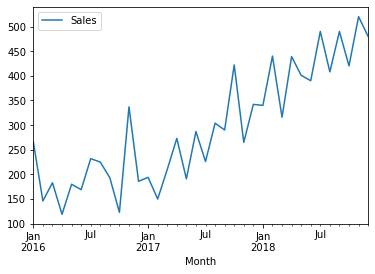

In [14]:
sales.plot()
plt.show()

## Stationary behaviour
- Mean, Varience and Covarience is constant over period

### Converting Series to Stationary

In [26]:
sales_diff=sales.diff(periods=1) #Integrated order of 1, denoted by d(difference), one of the params of ARMA model R
sales_diff=sales_diff[1:]
sales_diff.head()

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


__Correlation between the lags__

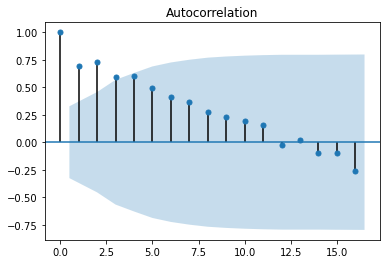

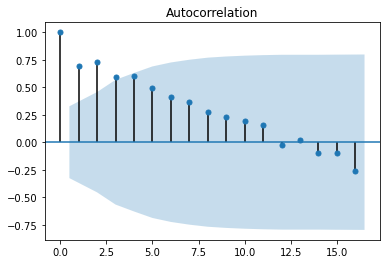

In [23]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)

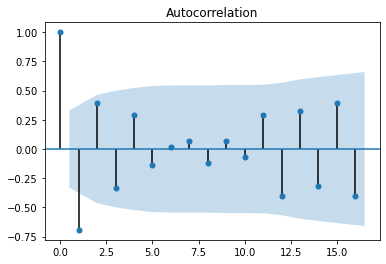

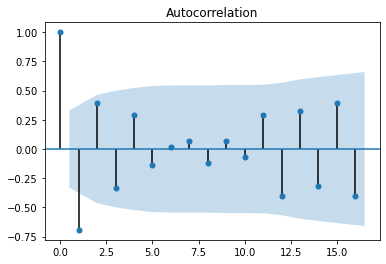

In [24]:
plot_acf(sales_diff)

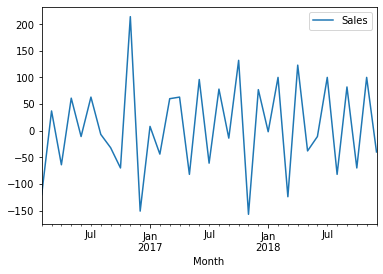

In [25]:
sales_diff.plot()

## Auto Regressive Model

In [27]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [31]:
x=sales.values
train=x[0:27] #27 data as train
test=x[27:] #9 data to test
predictions=[]

In [33]:
model_ar=AR(train)
model_ar_fit=model_ar.fit()

In [101]:
predictions=model_ar_fit.predict(start=27,end=36)


In [102]:
test

array([[439],
       [401],
       [390],
       [490],
       [408],
       [490],
       [420],
       [520],
       [480]], dtype=int64)

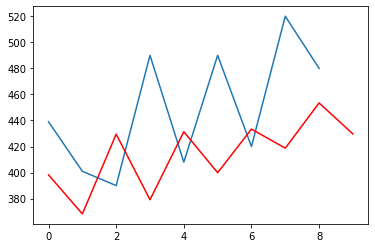

In [103]:
plt.plot(test)
plt.plot(predictions,color='red')

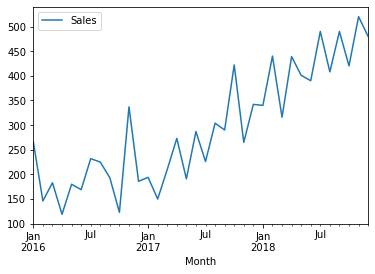

In [104]:
sales.plot()

## ARIMA Model


In [105]:
from statsmodels.tsa.arima_model import ARIMA

In [107]:
#p,d,q p=periods taken for autoregressive model
#d= integrated order, difference typically 1 or 2 should be enough
#q=period in moving order average model
model_arima=ARIMA(train,order=(9,1,0))
model_arima_fit=model_arima.fit()
print(model_arima_fit.aic)

299.13060488933615


In [113]:
predictions=model_arima_fit.forecast(steps=9)[0]
predictions

array([409.94987279, 358.18117367, 449.30836894, 436.35028616,
       466.32618023, 459.18357691, 490.30781658, 526.93357319,
       543.88275992])

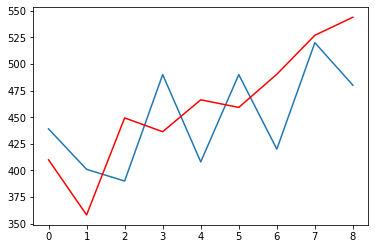

In [114]:
plt.plot(test)
plt.plot(predictions,color='red')

In [115]:
import itertools
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))

In [116]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima=ARIMA(train,order=param)
        model_arima_fit=model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 319.45285852307086
(0, 0, 1) 318.72448094002914
(0, 0, 2) 315.25060028728467
(0, 0, 3) nan
(0, 0, 4) nan
(0, 1, 0) 311.8293983488534
(0, 1, 1) 296.08415438653213
(0, 1, 2) 296.3229226907702
(0, 1, 3) 298.3120211738973
(0, 1, 4) 300.3393975617934
(0, 2, 0) 329.1834958250828
(0, 2, 1) 306.1019475462117
(0, 2, 2) 290.3983384811092
(0, 2, 3) 292.98588941378034
(1, 0, 0) 316.16687175223257
(1, 0, 1) 313.0487174404087
(1, 0, 2) 310.97906423129643
(1, 1, 0) 298.8325442271072
(1, 1, 1) 297.1256511258665
(1, 1, 2) 299.4716667062783
(1, 1, 4) 299.9787323971395
(1, 2, 0) 306.5307767571537
(2, 0, 0) 310.9969573652547
(2, 1, 0) 300.2089561240071
(2, 1, 1) 297.9999930167358
(2, 1, 2) 298.55054281302773
(2, 1, 3) 302.872082958299
(2, 2, 0) 306.2975856431777
(3, 0, 0) 312.9838587420611
(3, 0, 1) 335.87667740231313
(3, 1, 0) 294.8543584218638
(3, 1, 2) 292.66862386940255
(3, 1, 3) 294.6588907516945
(3, 2, 0) 299.4075868155548
(3, 2, 4) 291.2750490215028
(4, 0, 0) 316.8894678565293
(4, 0, 1) 3

In [119]:
mse=mean_squared_error(test,predictions)
mse

2499.6668841214214